In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1)

from textblob import TextBlob

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df.describe()

Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           1.000000               122.000000

In [4]:
df.shape

(23486, 11)

In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
df.head(10)

Unnamed: 0  Clothing ID  Age                                 Title  \
0           0          767   33                                   NaN   
1           1         1080   34                                   NaN   
2           2         1077   60               Some major design flaws   
3           3         1049   50                      My favorite buy!   
4           4          847   47                      Flattering shirt   
5           5         1080   49               Not for the very petite   
6           6          858   39                  Cagrcoal shimmer fun   
7           7          858   39  Shimmer, surprisingly goes with lots   
8           8         1077   24                            Flattering   
9           9         1077   34                     Such a fun dress!   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   
7  I ordered this in carbon for store pick up, an...       4                1   
8  I love this dress. i usually get an xs but it ...       5                1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
5                        4         General         Dresses    Dresses  
6                        1  General Petite            Tops      Knits  
7                        4  General Petite            Tops      Knits  
8                        0         General         Dresses    Dresses  
9                        0         General         Dresses    Dresses

In [7]:
df = df.drop(['Unnamed: 0','Clothing ID','Title', 'Division Name', 'Department Name'], axis = 1)

In [8]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count Class Name  
0                1                        0  Intimates  
1                1                        4    Dresses  
2                0                        0    Dresses  
3                1                        0      Pants  
4                1                        6    Blouses

In [9]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Class Name                  14
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Class Name                 0
dtype: int64

In [11]:
df.shape

(22628, 6)

In [12]:
df.describe()

Age        Rating  Recommended IND  Positive Feedback Count
count  22628.000000  22628.000000     22628.000000             22628.000000
mean      43.282880      4.183092         0.818764                 2.631784
std       12.328176      1.115911         0.385222                 5.787520
min       18.000000      1.000000         0.000000                 0.000000
25%       34.000000      4.000000         1.000000                 0.000000
50%       41.000000      5.000000         1.000000                 1.000000
75%       52.000000      5.000000         1.000000                 3.000000
max       99.000000      5.000000         1.000000               122.000000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      22628 non-null  int64 
 1   Review Text              22628 non-null  object
 2   Rating                   22628 non-null  int64 
 3   Recommended IND          22628 non-null  int64 
 4   Positive Feedback Count  22628 non-null  int64 
 5   Class Name               22628 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


<AxesSubplot:>

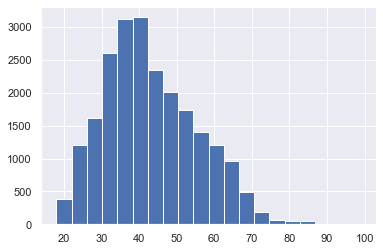

In [14]:
df['Age'].hist(bins=20)

<AxesSubplot:>

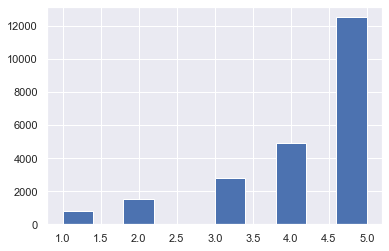

In [15]:
df['Rating'].hist(bins=10)

In [16]:
sentiment = []
for rate in df['Rating']:
    if rate < 3:
        sentiment.append('bad')
    elif rate > 3:
        sentiment.append('good')
    else:
        sentiment.append('neutral')
        
df['Sentiment'] = sentiment
df.head(10)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   
5   49  I love tracy reese dresses, but this one is no...       2   
6   39  I aded this in my basket at hte last mintue to...       5   
7   39  I ordered this in carbon for store pick up, an...       4   
8   24  I love this dress. i usually get an xs but it ...       5   
9   34  I'm 5"5' and 125 lbs. i ordered the s petite t...       5   

   Recommended IND  Positive Feedback Count Class Name Sentiment  
0                1                        0  Intimates      good  
1                1                        4    Dresses      good  
2                0                        0    Dresses   neutral  
3                1                        0      Pants      good  
4                1                        6    Blouses      good  
5                0                        4    Dresses       bad  
6                1                        1      Knits      good  
7                1                        4      Knits      good  
8                1                        0    Dresses      good  
9                1                        0    Dresses      good

<AxesSubplot:>

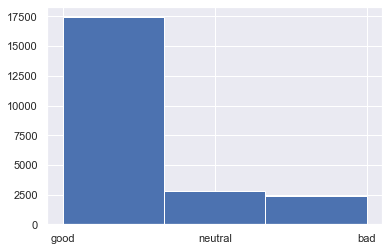

In [17]:
df['Sentiment'].hist(bins=3)

In [18]:
df_hm = df.drop(['Review Text'], axis = 1)

<AxesSubplot:>

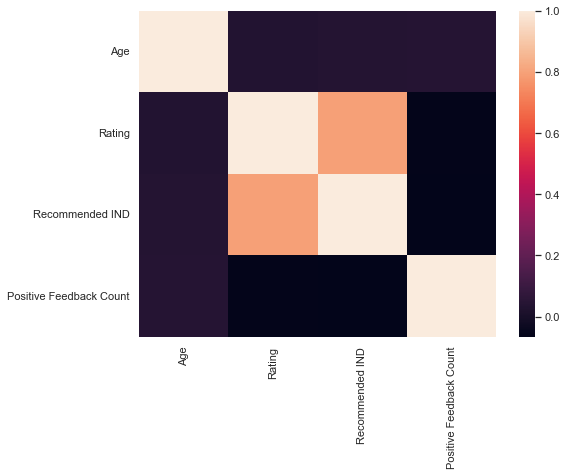

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df_hm.corr())

In [20]:
df_rt = df['Review Text'].str.lower()

In [21]:
stopwords = set(STOPWORDS)

In [22]:
text = " ".join(review for review in df_rt)

In [23]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text)


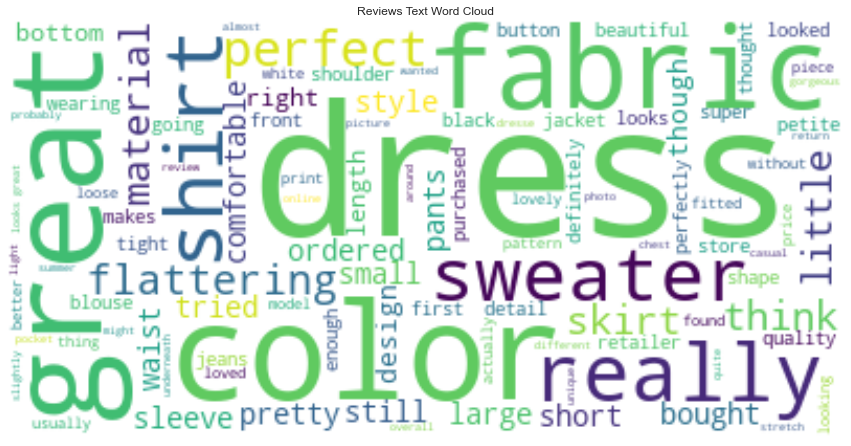

In [24]:
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Reviews Text Word Cloud')
plt.show()

In [25]:
df_rts = df[['Review Text','Sentiment']]


In [26]:
df_rts.groupby(['Sentiment']).count()

Review Text
Sentiment             
bad               2370
good             17435
neutral           2823

In [27]:
rev_tx =[]

for line in df_rts['Review Text']:
    rex = re.sub('[^\w\s]', '', line) #removing punctuations
    wd = ''
    for word in rex:
        wd += (word.lower())
        
    rev_tx.append(wd)
    

In [28]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wnet = WordNetLemmatizer
rev_txt = []
for txt in rev_tx:
    word = word_tokenize(txt) #word tokenizatin
    wd = [w for w in word if not w in stop_words] #removing stopword
    print(wd)
    rev_txt.append(wd)

['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable']
['love', 'dress', 'sooo', 'pretty', 'happened', 'find', 'store', 'im', 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', 'petite', 'bought', 'petite', '58', 'love', 'length', 'hits', 'little', 'knee', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite']
['high', 'hopes', 'dress', 'really', 'wanted', 'work', 'initially', 'ordered', 'petite', 'small', 'usual', 'size', 'found', 'outrageously', 'small', 'small', 'fact', 'could', 'zip', 'reordered', 'petite', 'medium', 'ok', 'overall', 'top', 'half', 'comfortable', 'fit', 'nicely', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper', 'c']
['love', 'love', 'love', 'jumpsuit', 'fun', 'flirty', 'fabulous', 'every', 'time', 'wear', 'get', 'nothing', 'great', 'compliments']
['shirt', 'flattering', 'due', 'adjustable', 'front', 'tie', 'perfect', 'length

In [29]:
rev_txtc = []
for ele in rev_txt:
    for e in ele:
        el = ', '.join(ele)
    rev_txtc.append(el)
    
df_hm['review_text'] = rev_txtc
df_hm.head(10)

Age  Rating  Recommended IND  Positive Feedback Count Class Name Sentiment  \
0   33       4                1                        0  Intimates      good   
1   34       5                1                        4    Dresses      good   
2   60       3                0                        0    Dresses   neutral   
3   50       5                1                        0      Pants      good   
4   47       5                1                        6    Blouses      good   
5   49       2                0                        4    Dresses       bad   
6   39       5                1                        1      Knits      good   
7   39       4                1                        4      Knits      good   
8   24       5                1                        0    Dresses      good   
9   34       5                1                        0    Dresses      good   

                                         review_text  
0    absolutely, wonderful, silky, sexy, comfortable  
1  love, dress, sooo, pretty, happened, find, sto...  
2  high, hopes, dress, really, wanted, work, init...  
3  love, love, love, jumpsuit, fun, flirty, fabul...  
4  shirt, flattering, due, adjustable, front, tie...  
5  love, tracy, reese, dresses, one, petite, 5, f...  
6  aded, basket, hte, last, mintue, see, would, l...  
7  ordered, carbon, store, pick, ton, stuff, alwa...  
8  love, dress, usually, get, xs, runs, little, s...  
9  im, 55, 125, lbs, ordered, petite, make, sure,...

In [30]:
le = LabelEncoder()

In [31]:
df_hm['Class Name'] = le.fit_transform(df_hm['Class Name'].values)
df_hm['Sentiment'] = le.fit_transform(df_hm.Sentiment.values)
df_hm['review_text'] = le.fit_transform(df_hm.review_text.values)

In [32]:
df_hm.head(10)

Age  Rating  Recommended IND  Positive Feedback Count  Class Name  \
0   33       4                1                        0           5   
1   34       5                1                        4           3   
2   60       3                0                        0           3   
3   50       5                1                        0          13   
4   47       5                1                        6           0   
5   49       2                0                        4           3   
6   39       5                1                        1           8   
7   39       4                1                        4           8   
8   24       5                1                        0           3   
9   34       5                1                        0           3   

   Sentiment  review_text  
0          1          488  
1          1        10800  
2          2         8134  
3          1        11384  
4          1        18446  
5          0        12669  
6          1          524  
7          1        14390  
8          1        10831  
9          1         8416

In [33]:
X = df_hm.drop(['Positive Feedback Count', 'Sentiment', 'Rating'], axis=1)
y = df_hm['Sentiment']

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
nb = GaussianNB()

In [36]:
nb.fit(Xtrain, ytrain)

GaussianNB()

In [37]:
nb_predict = nb.predict(Xtest)

In [38]:
print(classification_report(ytest,nb_predict))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69       713
           1       0.94      0.99      0.96      5246
           2       0.00      0.00      0.00       830

    accuracy                           0.86      6789
   macro avg       0.49      0.65      0.55      6789
weighted avg       0.78      0.86      0.81      6789



C:\Users\marpu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marpu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marpu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, nb_predict)

In [40]:
accuracy

0.8624245102371483

In [41]:
rfc = RandomForestClassifier()

In [42]:
rfc.fit(Xtrain, ytrain)

RandomForestClassifier()

In [43]:
rfc_predict = rfc.predict(Xtest)

In [44]:
print(classification_report(ytest,rfc_predict))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       713
           1       0.94      0.97      0.95      5246
           2       0.35      0.22      0.27       830

    accuracy                           0.84      6789
   macro avg       0.60      0.60      0.59      6789
weighted avg       0.82      0.84      0.83      6789



In [45]:
jupyter notebook list

SyntaxError: invalid syntax (Temp/ipykernel_19072/1373106854.py, line 1)